In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataFrame=pd.read_csv("C:\\Users\\DELL\\Downloads\\spotify-2023.csv")
df=pd.DataFrame(dataFrame,columns=['track_name','artist(s)_name','artist_count','released_year','released_month','released_day','in_spotify_playlists','in_spotify_charts','streams','in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts,in_shazam_charts','bpm','key','mode','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%'])
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4.0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4.0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6.0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15.0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3.0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6.0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6.0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5.0


In [39]:
#Basic Descriptive Statistics
# Convert the streams column to numeric, so the code will work
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')


# Calculate mean, median, and standard deviation of the streams column
Mean = df['streams'].mean()
Median = df['streams'].median()
STD = df['streams'].std()

# Print the results of:Mean,Median,Mode
print(f"Mean of streams: {Mean}")
print(f"Median of streams: {Median}")
print(f"Standard Deviation of streams: {STD}")


Mean of streams: 514044878.8876051
Median of streams: 290530915.0
Standard Deviation of streams: 566933763.9490253


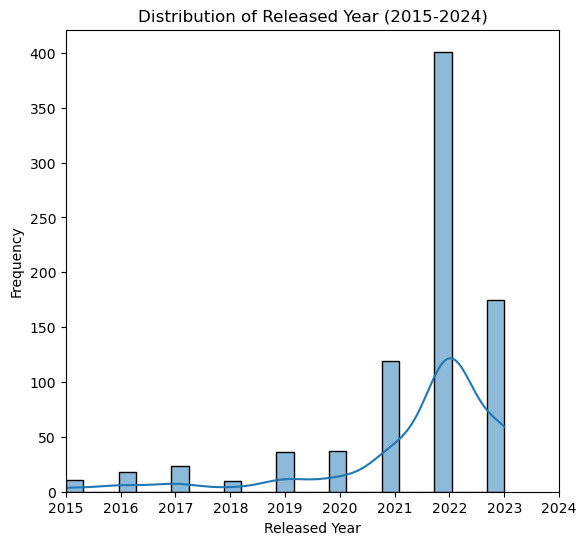

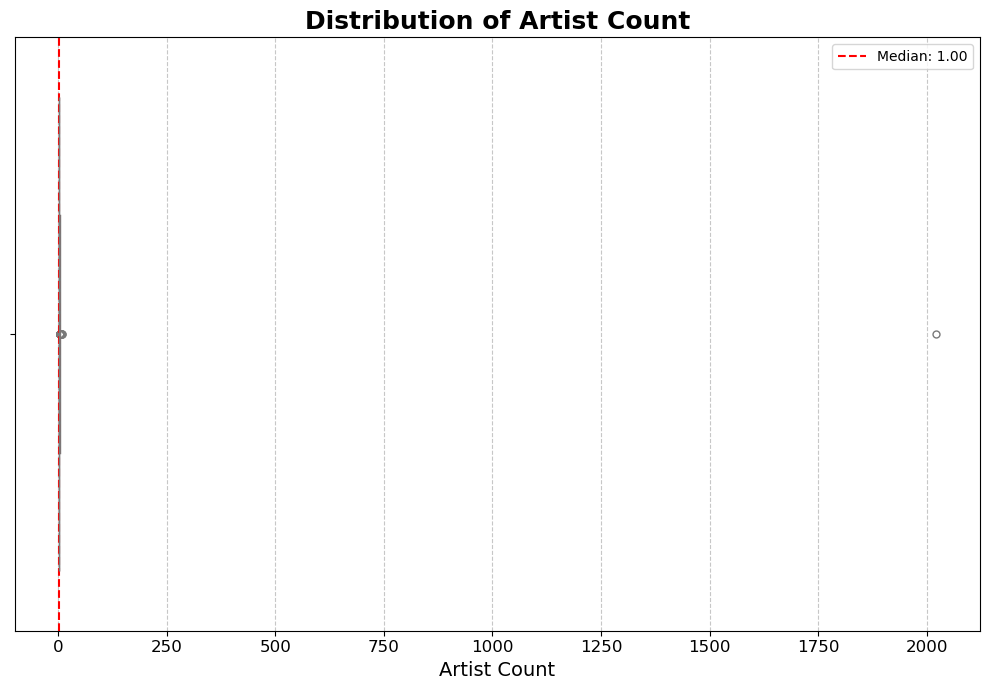

In [11]:
#Basic Descriptive Statistics
df_filtered = df[(df['released_year'] >= 2015) & (df['released_year'] <= 2024)]

# Set up the figure for subplots
plt.figure(figsize=(14, 6))

# Histogram for released_year
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['released_year'], bins=25, kde=True)
plt.title('Distribution of Released Year (2015-2024)')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.xlim(2015, 2024)  

#Artist Count
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['artist_count'], color='lightblue', fliersize=5)

plt.title('Distribution of Artist Count', fontsize=18, fontweight='bold')
plt.xlabel('Artist Count', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optionally, add a vertical line for the median
median = df['artist_count'].median()
plt.axvline(median, color='red', linestyle='--', label='Median: {:.2f}'.format(median))
plt.legend()

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [11]:
#Top performers
#To fix the errors 
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop rows with NaN in 'streams' 
df.dropna(subset=['streams'], inplace=True)

# Get the top 5 rows with the highest stream counts
top_5_streams = df.nlargest(5, 'streams')


top_5_streams

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7.0
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8.0
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3.0
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10.0
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5.0


In [6]:
#Top performers
top_artists = df['artist(s)_name'].value_counts().head(5)

# Convert to DataFrame with column names
top_artists_df = top_artists.reset_index()
top_artists_df.columns = ['artist(s)_name', 'count']

# Display the DataFrame
display(top_artists_df)


,artist(s)_name,count
0,Taylor Swift,33
1,The Weeknd,22
2,SZA,19
3,Bad Bunny,19
4,Harry Styles,17


<function matplotlib.pyplot.show(close=None, block=None)>

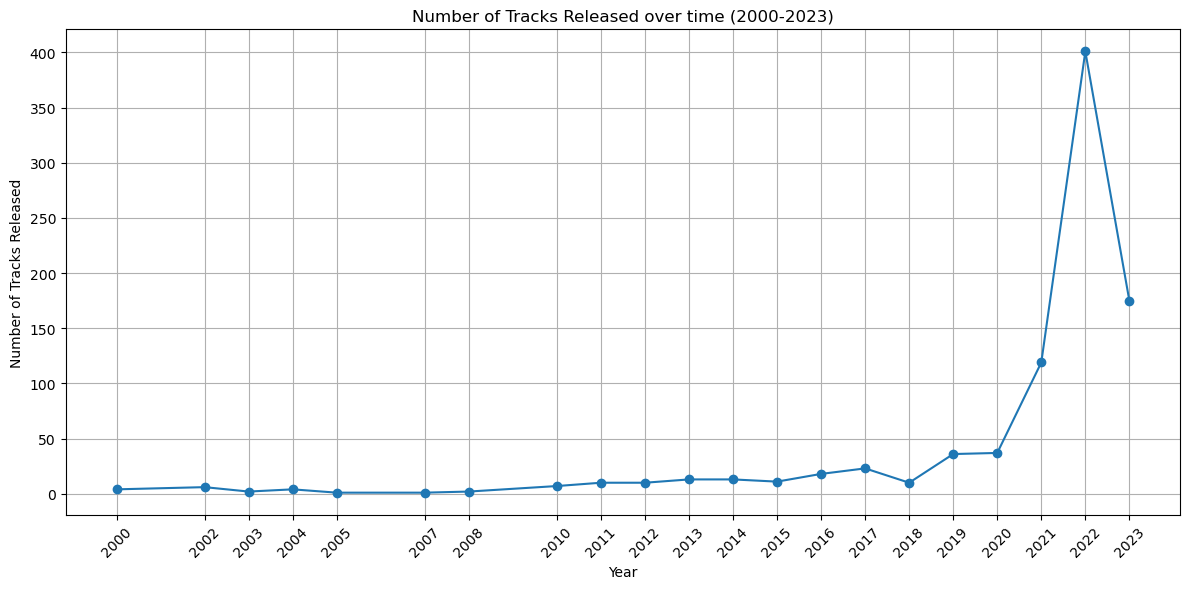

In [107]:
#Temporal Trends
df_filtered = df[(df['released_year'] >= 2000) & (df['released_year'] <= 2023)]

# Count the number of tracks released per year
tracks_per_year = df_filtered['released_year'].value_counts().sort_index()

# Create a plot for the number of tracks released per year
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', linestyle='-')
plt.title('Number of Tracks Released over time (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.xticks(tracks_per_year.index, rotation=45)
plt.grid()
plt.tight_layout()  # Adjust layout to make room for x-tick labels
plt.show

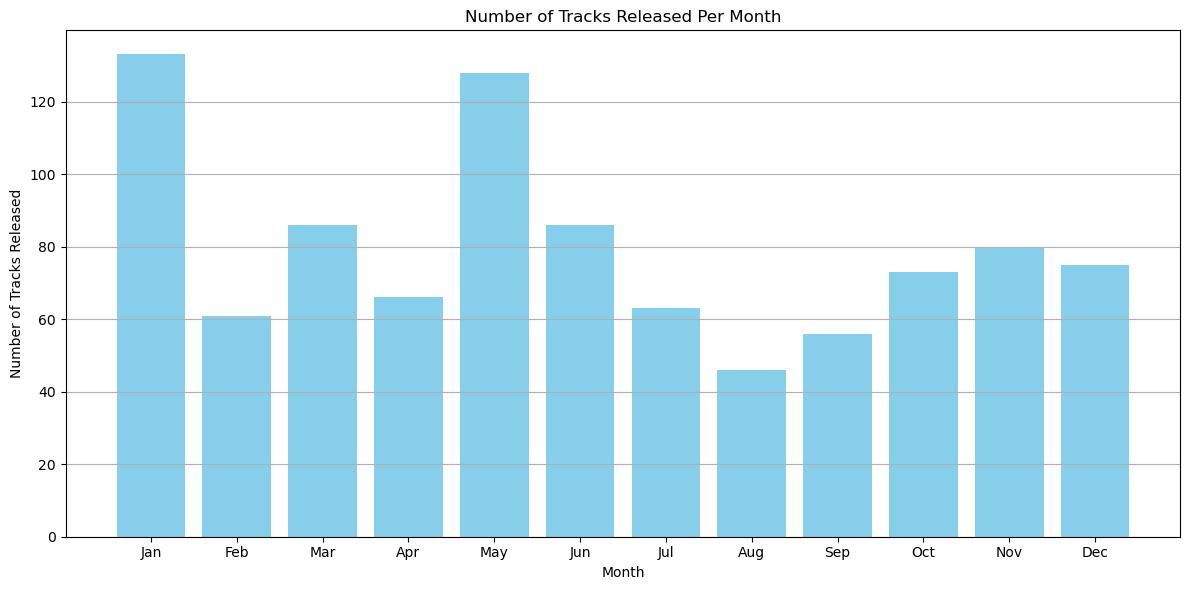

The month with the most releases is: 1 with 133 releases.


In [116]:
#Temporal Trends
Tracksper_month = df['released_month'].value_counts().sort_index()

# Create a plot for the number of tracks released per month
plt.figure(figsize=(12, 6))
plt.bar(Tracksper_month.index, Tracksper_month.values, color='skyblue')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for x-tick labels
plt.show()

# Identify the month with the most releases
most_releases_month = tracks_per_month.idxmax()
most_releases_count = tracks_per_month.max()
print(f"The month with the most releases is: {most_releases_month} with {most_releases_count} releases.")

Number of  values in streams column after conversion: 0
Number of  values in bpm column after conversion: 1
Number of  values in danceability_% column after conversion: 0
Number of  values in energy_% column after conversion: 0


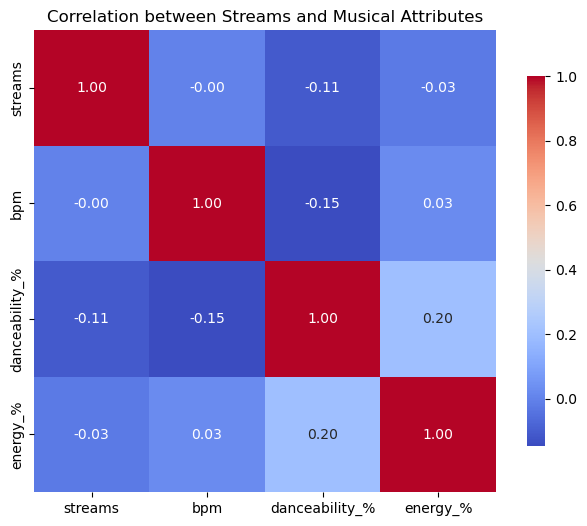

The attribute that influences streams the most is: 'danceability_%' with a correlation of -0.11.


In [13]:
#Genre and Music Characteristics

# Convert relevant columns to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')

# Check for conversion
print("Number of  values in streams column after conversion:", df['streams'].isna().sum())
print("Number of  values in bpm column after conversion:", df['bpm'].isna().sum())
print("Number of  values in danceability_% column after conversion:", df['danceability_%'].isna().sum())
print("Number of  values in energy_% column after conversion:", df['energy_%'].isna().sum())


# Select relevant columns for correlation analysis
correlation_data = df[['streams', 'bpm', 'danceability_%', 'energy_%']].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation between Streams and Musical Attributes')
plt.show()

# Identify the attributes with the highest correlation with streams
correlation_with_streams = correlation_matrix['streams'].drop('streams')
highest_correlation = correlation_with_streams.abs().idxmax()
highest_correlation_value = correlation_with_streams[highest_correlation]

print(f"The attribute that influences streams the most is: '{highest_correlation}' with a correlation of {highest_correlation_value:.2f}.")

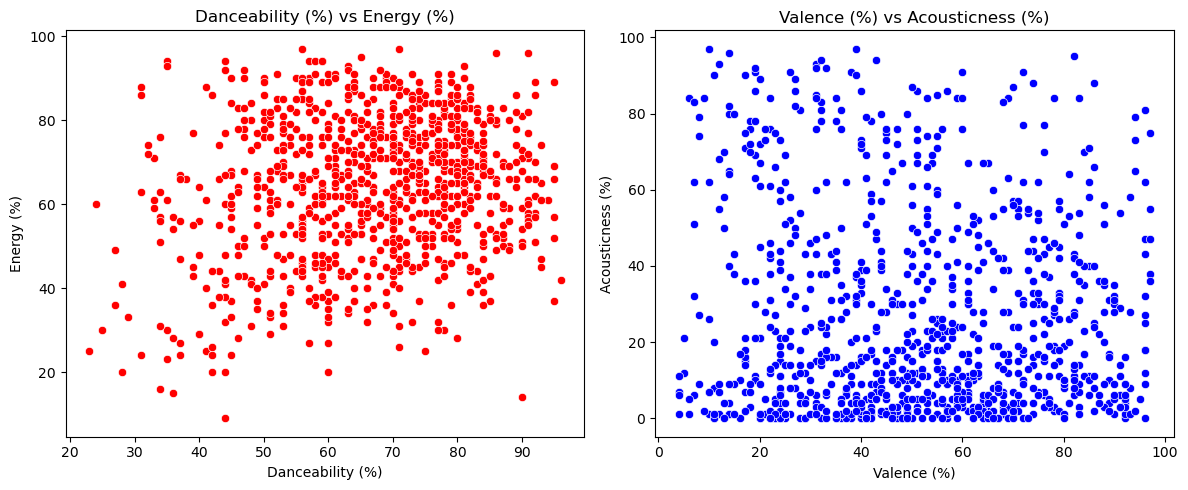

In [132]:
#Genre and Music Characteristics
plt.figure(figsize=(12, 5))

# Scatter plot for Danceability vs Energy
plt.subplot(1, 2, 1)
sns.scatterplot(x='danceability_%', y='energy_%', data=df, color='red')
plt.title('Danceability (%) vs Energy (%)')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')

# Scatter plot for Valence vs Acousticness
plt.subplot(1, 2, 2)
sns.scatterplot(x='valence_%', y='acousticness_%', data=df, color='blue')
plt.title('Valence (%) vs Acousticness (%)')
plt.xlabel('Valence (%)')
plt.ylabel('Acousticness (%)')

plt.tight_layout()
plt.show()

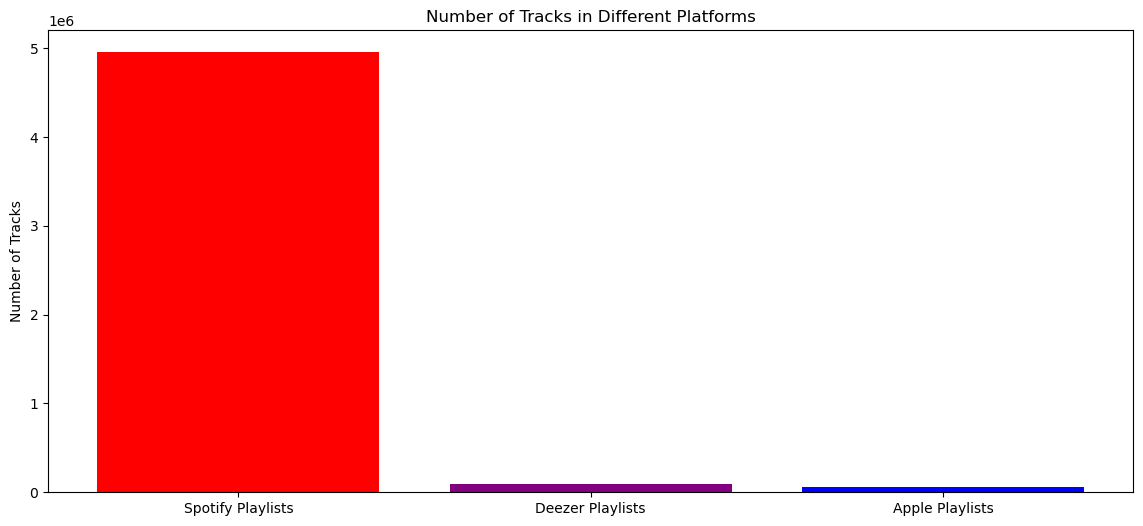

Average Streams for Each Platform:
Spotify Playlists: 514585409.77 streams
Deezer Playlists: 411293622.75 streams
Apple Playlists: 517359959.25 streams


In [18]:
#Platform Popularity
numeric_columns = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 'streams']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values for binary columns
df['in_spotify_playlists'] = df['in_spotify_playlists'].fillna(0)
df['in_deezer_playlists'] = df['in_deezer_playlists'].fillna(0)
df['in_apple_playlists'] = df['in_apple_playlists'].fillna(0)

# Calculate the number of tracks in each category
track_counts = {
    'Spotify Playlists': df['in_spotify_playlists'].sum(),
    'Deezer Playlists': df['in_deezer_playlists'].sum(),
    'Apple Playlists': df['in_apple_playlists'].sum()
}

# Create a bar plot to compare the number of tracks
plt.figure(figsize=(14, 6))
plt.bar(track_counts.keys(), track_counts.values(), color=['red', 'purple', 'blue'])
plt.title('Number of Tracks in Different Platforms')
plt.ylabel('Number of Tracks')
plt.show()

# Calculate average streams for tracks in each category
avg_streams = {
    'Spotify Playlists': df[df['in_spotify_playlists'] > 0]['streams'].mean(),
    'Deezer Playlists': df[df['in_deezer_playlists'] > 0]['streams'].mean(),
    'Apple Playlists': df[df['in_apple_playlists'] > 0]['streams'].mean()
}

# Print average streams
print("Average Streams for Each Platform:")
for platform, avg in avg_streams.items():
    print(f"{platform}: {avg:.2f} streams")

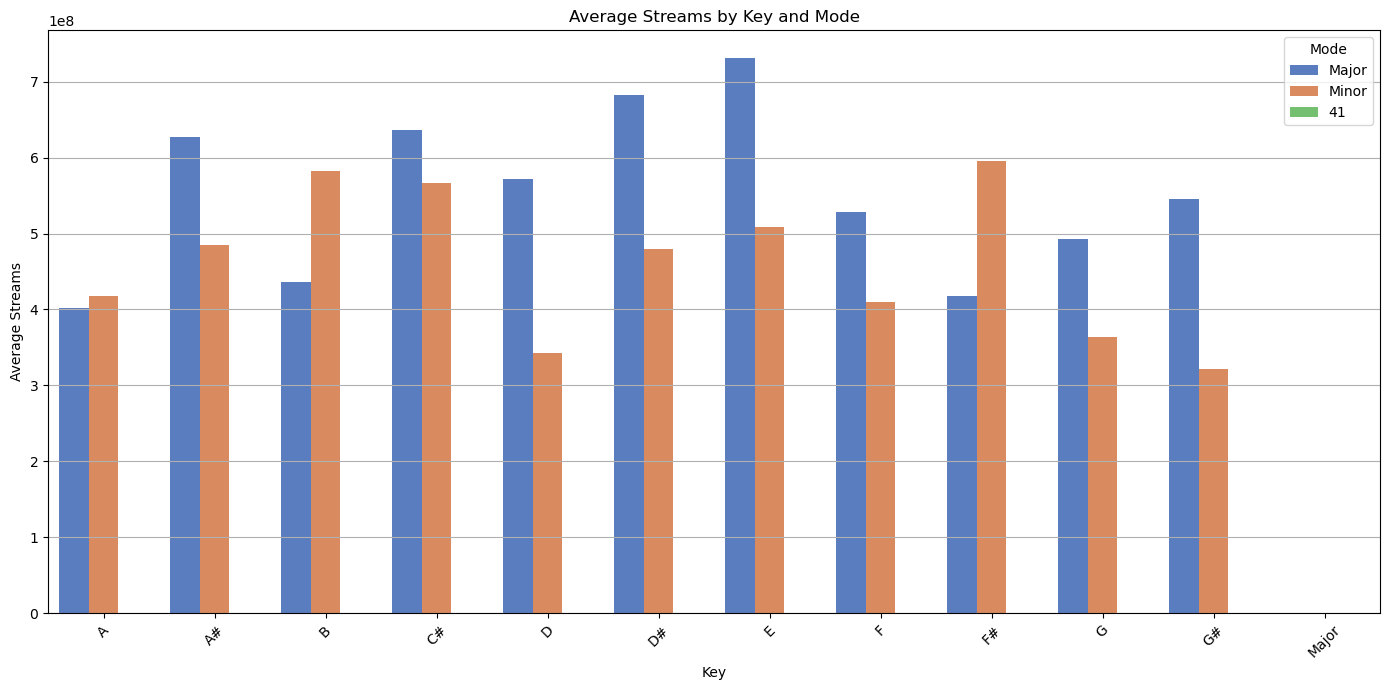

In [146]:
#Advanced Analysis
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Group by key and mode, and calculate average streams
key_mode_streams = df.groupby(['key', 'mode'])['streams'].agg(['mean', 'median', 'std', 'count']).reset_index()

# Display the statistics


# Create a bar plot for average streams by key and mode
plt.figure(figsize=(14, 7))
sns.barplot(data=key_mode_streams, x='key', y='mean', hue='mode', palette='muted')
plt.title('Average Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.legend(title='Mode')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [164]:
#Advanced Analysis
artist_playlists = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()
artist_charts = df.groupby('artist(s)_name')['in_spotify_charts'].sum().reset_index()

# Rename columns for clarity
artist_playlists.rename(columns={'in_spotify_playlists': 'playlist_count'}, inplace=True)
artist_charts.rename(columns={'in_spotify_charts': 'chart_count'}, inplace=True)

# Merge the two dataframes on artist name
artist_summary = pd.merge(artist_playlists, artist_charts, on='artist(s)_name', how='outer').fillna(0)
artist_summary['playlist_count'] = artist_summary['playlist_count'].astype(int)
artist_summary['chart_count'] = artist_summary['chart_count'].astype(int)

# Sort by playlist and chart counts
artist_summary = artist_summary.sort_values(by=['playlist_count', 'chart_count'], ascending=False)
artist_summary.head(10)  # Display the top 10 artists

,artist(s)_name,playlist_count,chart_count
575,The Weeknd,144053,180
561,Taylor Swift,132458,504
164,Ed Sheeran,128758,94
228,Harry Styles,110026,185
176,Eminem,87331,152
30,Arctic Monkeys,84016,190
116,Coldplay,75716,72
38,Avicii,68241,42
146,"Dr. Dre, Snoop Dogg",65728,0
12,Adele,65049,69
